In [21]:
pip install isodate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 949.2 kB/s eta 0:00:00


In [23]:
import pandas as pd
import numpy as np
from dateutil import parser
import isodate

# Data visualization libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

In [61]:
#NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
video=pd.read_csv("vidio_csv_f.csv")

In [26]:
video.head()

video_id channelTitle  \
0  wl9zCLyBDU4   Krish Naik   
1  yPphKQp1fqE   Krish Naik   
2  wN07Wwtp6LE   Krish Naik   
3  l5a_uKnbEr4   Krish Naik   
4  UCqyn1v3q4M   Krish Naik   

                                               title  \
0      What Is a Good Data Science Project For Jobs?   
1  Ollama-Run large language models Locally-Run L...   
2  The Era of 1-bit LLMs-All Large Language Model...   
3  Part 2-LoRA,QLoRA Indepth Mathematical Intuiti...   
4                   Data Science Projects For Resume   

                                         description  \
0  In this video I will be dicussing about key po...   
1  Get up and running with large language models,...   
2  In this work,a 1-bit LLM variant,namely BitNet...   
3  In this video we will be dicussing about amazi...   
4  github: https://github.com/krishnaik06/Data-Sc...   

                                                tags           publishedAt  \
0  ['yt:cc=on', 'end to end data science project'...  2024-03-05T12:05:00Z   
1  ['yt:cc=on', 'ollama tutorials', 'run llm mode...  2024-03-03T11:25:58Z   
2  ['yt:cc=on', '1 bit llm models', 'llm models i...  2024-02-29T10:03:01Z   
3  ['yt:cc=on', 'Lora finetuning', 'QLoRA finetun...  2024-02-27T10:48:47Z   
4  ['yt:cc=on', 'data science projects', 'ml proj...  2024-02-26T14:42:06Z   

   viewCount  likeCount  favouriteCount  commentCount  duration definition  \
0      20932      804.0             NaN          37.0  PT13M41S         hd   
1      17096      300.0             NaN          36.0  PT20M58S         hd   
2      28781      518.0             NaN          54.0   PT17M6S         hd   
3       9862      229.0             NaN          14.0  PT22M44S         hd   
4      22594     1059.0             NaN          54.0   PT8M45S         hd   

   caption  
0    False  
1    False  
2    False  
3    False  
4    False

In [27]:
video.tail()

video_id                 channelTitle  \
4928  XNgt7F6FqDU  StatQuest with Josh Starmer   
4929  fglJIFv08hs  StatQuest with Josh Starmer   
4930  2AQKmw14mHM  StatQuest with Josh Starmer   
4931  Sn-keVh_ERw  StatQuest with Josh Starmer   
4932  yMYcH8-OfJk  StatQuest with Josh Starmer   

                                         title  \
4928  The standard error, Clearly Explained!!!   
4929   Wrapping up dumplings for pot stickers.   
4930           R-squared, Clearly Explained!!!   
4931                                onion-dice   
4932                            Cutting Butter   

                                            description  \
4928  This StatQuest explains what the standard erro...   
4929  Here's how to wrap up a dumpling that can be m...   
4930  R-squared is one of the most useful metrics in...   
4931  This is how I dice an onion, letting the layer...   
4932  This is how I cut butter into the flour when m...   

                                                   tags           publishedAt  \
4928  ['Standard Error', 'bootstrapping', 'statquest...  2015-05-12T14:10:24Z   
4929  ['Dumpling (Type Of Dish)', 'pot stickers', 'C...  2015-04-19T21:18:04Z   
4930      ['Coefficient Of Determination', 'r squared']  2015-02-03T14:48:20Z   
4931                                         ['iMovie']  2014-09-28T16:12:29Z   
4932                            ['buttermilk biscuits']  2014-08-24T21:40:26Z   

      viewCount  likeCount  favouriteCount  commentCount  duration definition  \
4928     204652     4250.0             NaN         253.0  PT11M44S         sd   
4929       9175      113.0             NaN          17.0     PT23S         hd   
4930     560722    12124.0             NaN         702.0   PT11M1S         sd   
4931      11321      147.0             NaN          39.0     PT36S         hd   
4932      17471      200.0             NaN          65.0     PT38S         sd   

      caption  
4928     True  
4929    False  
4930     True  
4931    False  
4932    False

In [28]:
video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4933 entries, 0 to 4932
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        4933 non-null   object 
 1   channelTitle    4933 non-null   object 
 2   title           4933 non-null   object 
 3   description     4891 non-null   object 
 4   tags            4470 non-null   object 
 5   publishedAt     4933 non-null   object 
 6   viewCount       4933 non-null   int64  
 7   likeCount       4932 non-null   float64
 8   favouriteCount  0 non-null      float64
 9   commentCount    4931 non-null   float64
 10  duration        4933 non-null   object 
 11  definition      4933 non-null   object 
 12  caption         4933 non-null   bool   
dtypes: bool(1), float64(3), int64(1), object(8)
memory usage: 467.4+ KB


In [29]:
video.shape

(4933, 13)

In [30]:
video.describe()

viewCount      likeCount  favouriteCount  commentCount
count  4.933000e+03    4932.000000             0.0   4931.000000
mean   9.227934e+04    2053.918897             NaN    119.180694
std    2.315386e+05    6143.166154             NaN    245.131034
min    0.000000e+00       0.000000             NaN      0.000000
25%    8.321000e+03     190.750000             NaN     16.000000
50%    2.437100e+04     540.000000             NaN     47.000000
75%    7.972000e+04    1587.250000             NaN    114.000000
max    4.302462e+06  184989.000000             NaN   4354.000000

In [31]:
video.isnull().any()

video_id          False
channelTitle      False
title             False
description        True
tags               True
publishedAt       False
viewCount         False
likeCount          True
favouriteCount     True
commentCount       True
duration          False
definition        False
caption           False
dtype: bool

In [32]:
video.publishedAt.sort_values().value_counts()

2013-06-28T02:54:45Z    11
2014-07-30T02:52:13Z    10
2019-07-03T05:15:02Z     6
2016-05-03T23:06:55Z     5
2013-06-28T02:54:44Z     5
                        ..
2019-02-19T17:30:01Z     1
2019-02-19T03:23:50Z     1
2019-02-18T20:15:01Z     1
2019-02-15T13:59:31Z     1
2024-03-07T06:15:27Z     1
Name: publishedAt, Length: 4875, dtype: int64

In [16]:
cols = ['viewCount', 'likeCount', 'favouriteCount', 'commentCount']
video[cols] = video[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [34]:
video['publishedAt'] =  video['publishedAt'].apply(lambda x: parser.parse(x))
video['pushblishDayName'] = video['publishedAt'].apply(lambda x: x.strftime("%A"))

In [35]:
video['durationSecs'] = video['duration'].apply(lambda x: isodate.parse_duration(x))
video['durationSecs'] = video['durationSecs'].astype('timedelta64[s]')

In [37]:
# Add number of tags
video['tagsCount'] = video['tags'].apply(lambda x: 0 if x is None else len(x))

TypeError: object of type 'float' has no len()

In [38]:
# Comments and likes per 1000 view ratio
video['likeRatio'] = video['likeCount']/ video['viewCount'] * 1000
video['commentRatio'] = video['commentCount']/ video['viewCount'] * 1000

In [39]:
video['titleLength'] = video['title'].apply(lambda x: len(x))

In [40]:
video.head()

video_id channelTitle  \
0  wl9zCLyBDU4   Krish Naik   
1  yPphKQp1fqE   Krish Naik   
2  wN07Wwtp6LE   Krish Naik   
3  l5a_uKnbEr4   Krish Naik   
4  UCqyn1v3q4M   Krish Naik   

                                               title  \
0      What Is a Good Data Science Project For Jobs?   
1  Ollama-Run large language models Locally-Run L...   
2  The Era of 1-bit LLMs-All Large Language Model...   
3  Part 2-LoRA,QLoRA Indepth Mathematical Intuiti...   
4                   Data Science Projects For Resume   

                                         description  \
0  In this video I will be dicussing about key po...   
1  Get up and running with large language models,...   
2  In this work,a 1-bit LLM variant,namely BitNet...   
3  In this video we will be dicussing about amazi...   
4  github: https://github.com/krishnaik06/Data-Sc...   

                                                tags  \
0  ['yt:cc=on', 'end to end data science project'...   
1  ['yt:cc=on', 'ollama tutorials', 'run llm mode...   
2  ['yt:cc=on', '1 bit llm models', 'llm models i...   
3  ['yt:cc=on', 'Lora finetuning', 'QLoRA finetun...   
4  ['yt:cc=on', 'data science projects', 'ml proj...   

                publishedAt  viewCount  likeCount  favouriteCount  \
0 2024-03-05 12:05:00+00:00      20932      804.0             NaN   
1 2024-03-03 11:25:58+00:00      17096      300.0             NaN   
2 2024-02-29 10:03:01+00:00      28781      518.0             NaN   
3 2024-02-27 10:48:47+00:00       9862      229.0             NaN   
4 2024-02-26 14:42:06+00:00      22594     1059.0             NaN   

   commentCount  duration definition  caption pushblishDayName  durationSecs  \
0          37.0  PT13M41S         hd    False          Tuesday         821.0   
1          36.0  PT20M58S         hd    False           Sunday        1258.0   
2          54.0   PT17M6S         hd    False         Thursday        1026.0   
3          14.0  PT22M44S         hd    False          Tuesday        1364.0   
4          54.0   PT8M45S         hd    False           Monday         525.0   

   likeRatio  commentRatio  titleLength  
0  38.410090      1.767629           45  
1  17.547964      2.105756           82  
2  17.997985      1.876238           64  
3  23.220442      1.419590           71  
4  46.870851      2.390015           32

In [41]:
video.describe()

viewCount      likeCount  favouriteCount  commentCount  \
count  4.933000e+03    4932.000000             0.0   4931.000000   
mean   9.227934e+04    2053.918897             NaN    119.180694   
std    2.315386e+05    6143.166154             NaN    245.131034   
min    0.000000e+00       0.000000             NaN      0.000000   
25%    8.321000e+03     190.750000             NaN     16.000000   
50%    2.437100e+04     540.000000             NaN     47.000000   
75%    7.972000e+04    1587.250000             NaN    114.000000   
max    4.302462e+06  184989.000000             NaN   4354.000000   

       durationSecs    likeRatio  commentRatio  titleLength  
count   4933.000000  4922.000000   4919.000000  4933.000000  
mean    1140.386783          inf      2.466418    60.999189  
std     1708.161251          NaN      3.432359    19.618740  
min        0.000000     0.000000      0.000000     4.000000  
25%      394.000000    12.836951      0.799708    47.000000  
50%      673.000000    22.677191      1.485394    61.000000  
75%     1170.000000    34.295559      2.804746    76.000000  
max    42896.000000          inf     64.910026   105.000000

<ipython-input-42-f7e6b7fee60a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = video.corr() # Finding out the correlation between the features


<Axes: >

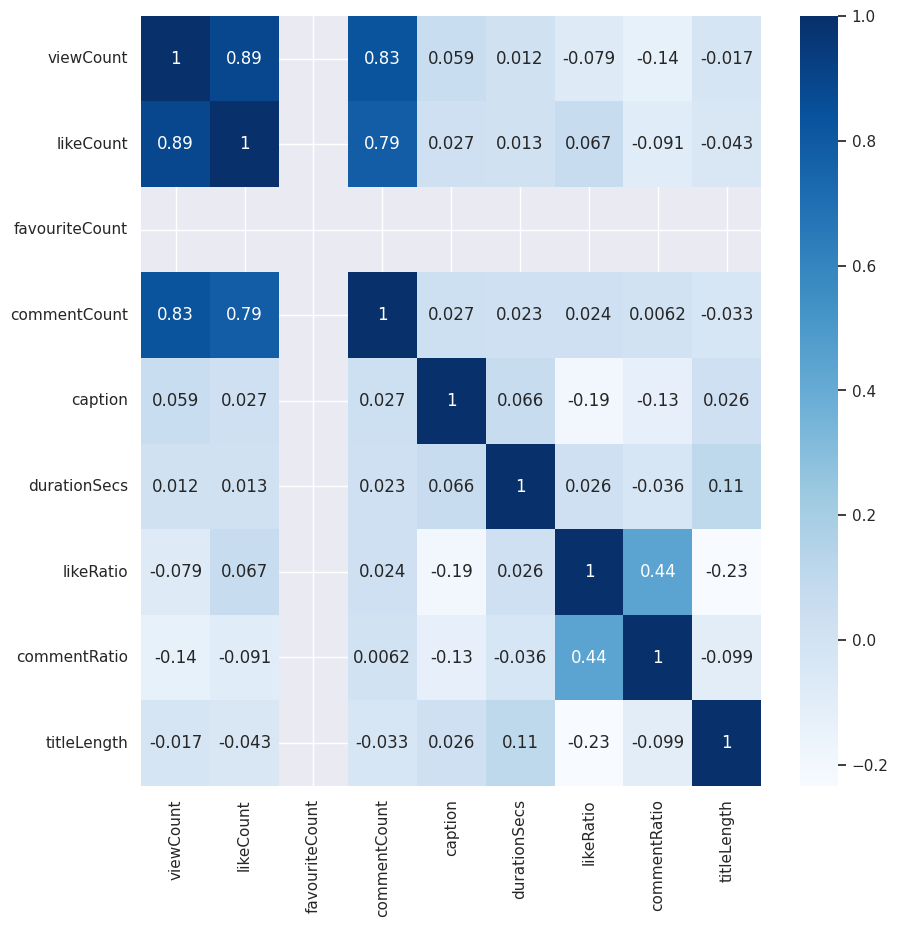

In [42]:
corr = video.corr() # Finding out the correlation between the features
sns.set(rc={'figure.figsize': (10,10)}) # Plotting the heatmap of correlation between features
sns.heatmap(corr, annot=True, cmap='Blues')

In [43]:
video.isnull().sum()

video_id               0
channelTitle           0
title                  0
description           42
tags                 463
publishedAt            0
viewCount              0
likeCount              1
favouriteCount      4933
commentCount           2
duration               0
definition             0
caption                0
pushblishDayName       0
durationSecs           0
likeRatio             11
commentRatio          14
titleLength            0
dtype: int64

In [45]:
favouriteCountof_mean=video.favouriteCount.mean()

In [46]:
print(favouriteCountof_mean)

nan


In [47]:
video.favouriteCount.fillna(favouriteCountof_mean,inplace=True)

In [48]:
video.isnull().sum()

video_id               0
channelTitle           0
title                  0
description           42
tags                 463
publishedAt            0
viewCount              0
likeCount              1
favouriteCount      4933
commentCount           2
duration               0
definition             0
caption                0
pushblishDayName       0
durationSecs           0
likeRatio             11
commentRatio          14
titleLength            0
dtype: int64

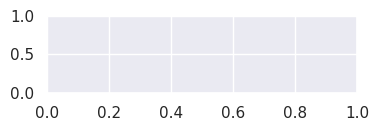

In [49]:
likeRatioof_mean=video.likeRatio.mean()

<ipython-input-82-ec398cf49f42>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


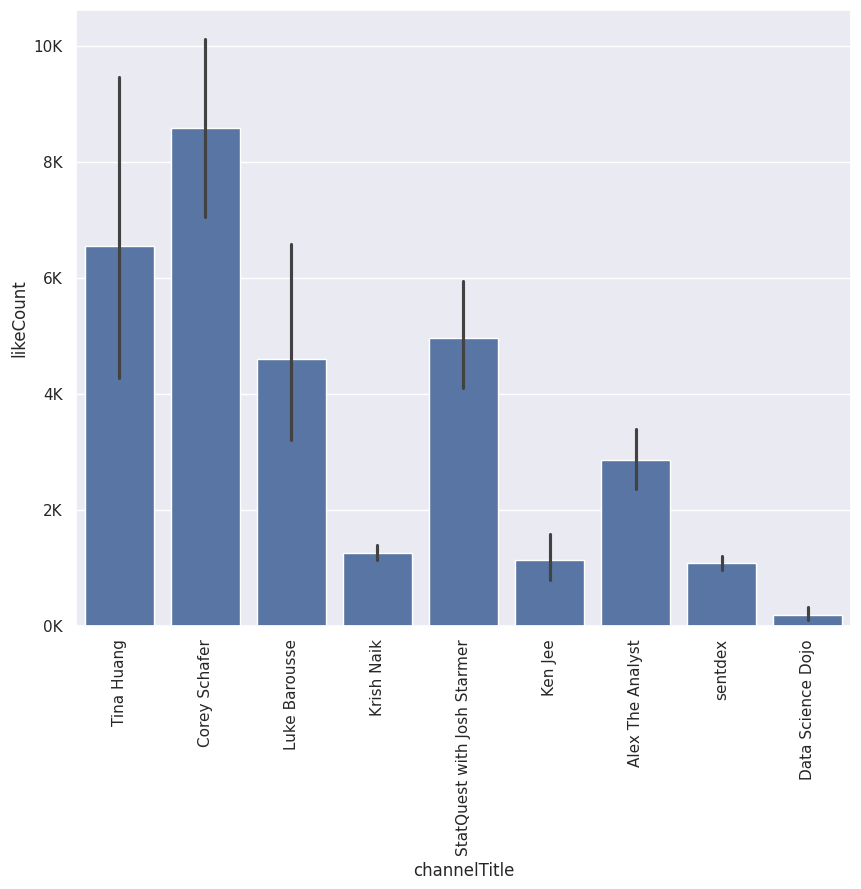

In [82]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='channelTitle', y='likeCount', data=video.sort_values('likeCount', ascending=False))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plot = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

<ipython-input-84-c4c901a3bd33>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


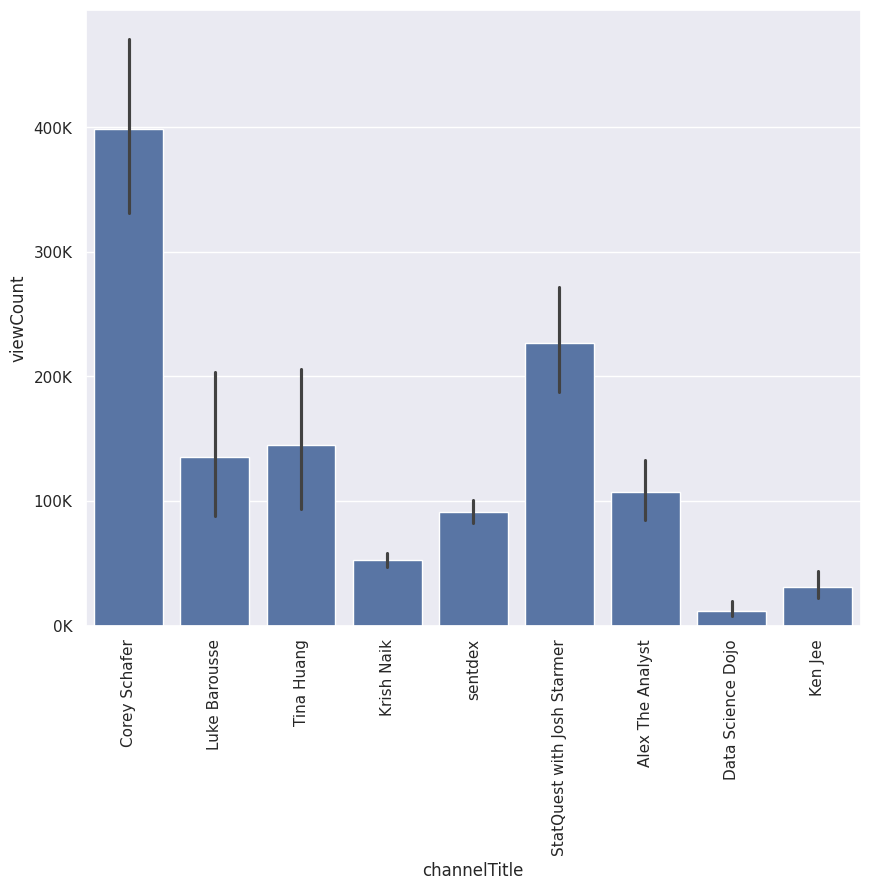

In [84]:
ax = sns.barplot(x='channelTitle', y='viewCount', data=video.sort_values('viewCount', ascending=False))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plot = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


ValueError: num must be an integer with 1 <= num <= 9, not 10

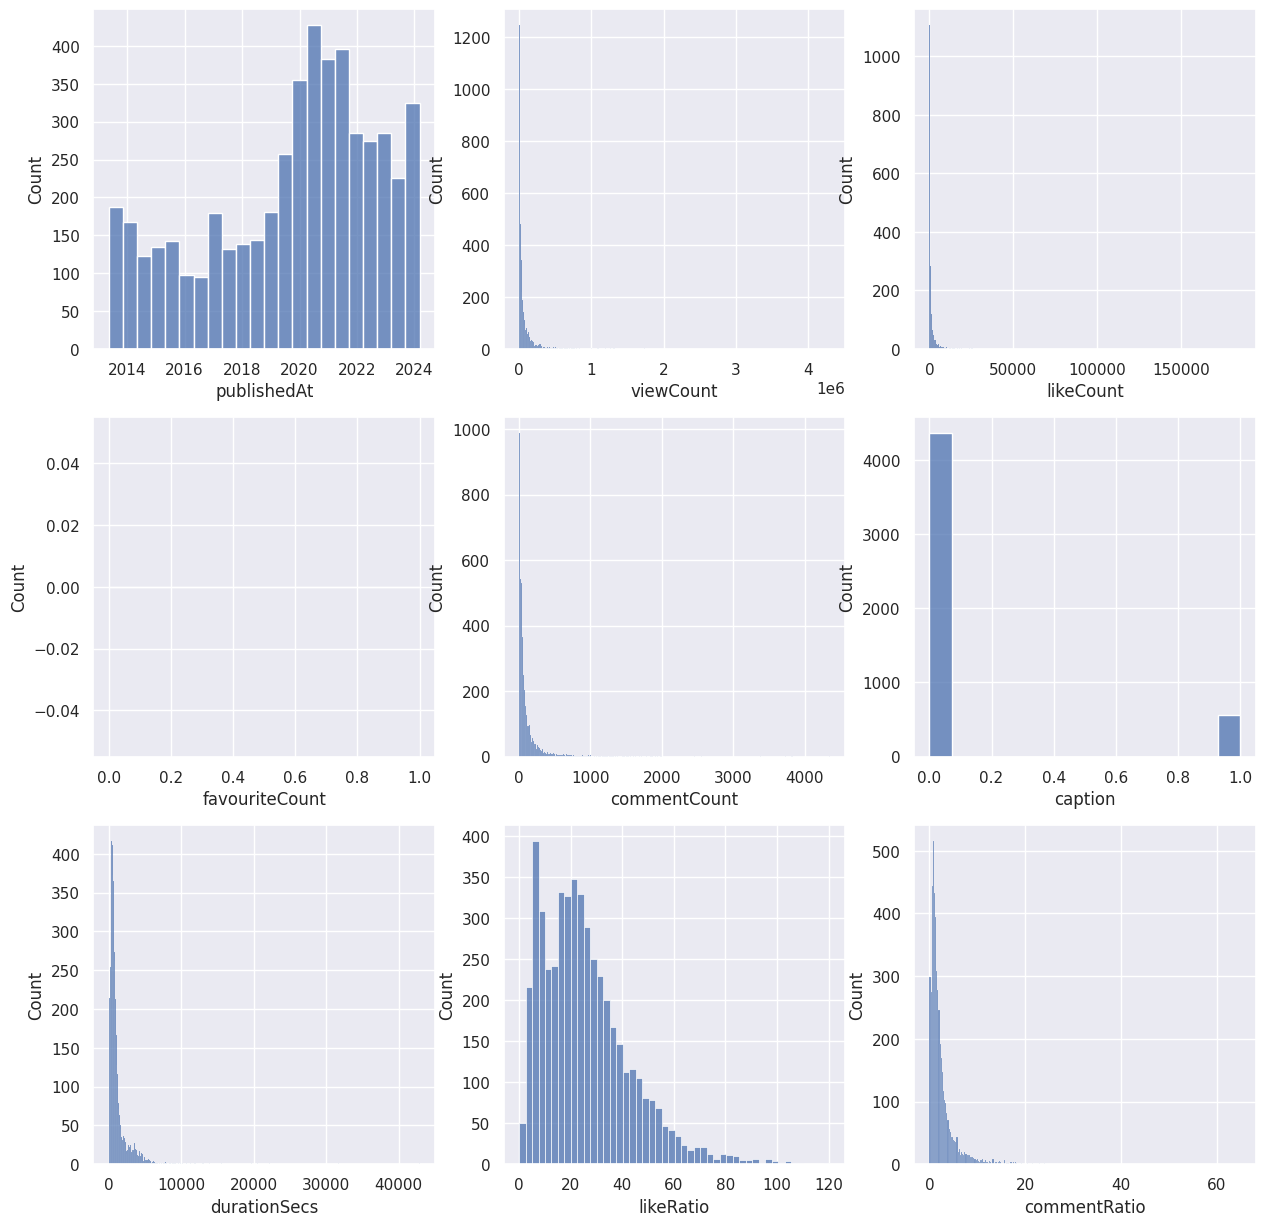

In [51]:
cols = 3
rows = 3
num_cols = video.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
#for i in num_cols:
    ax=fig.add_subplot(rows,cols,i+1)

    sns.histplot(x = video[col], ax = ax)

fig.tight_layout()
plt.show()

<Axes: xlabel='likeCount', ylabel='viewCount'>

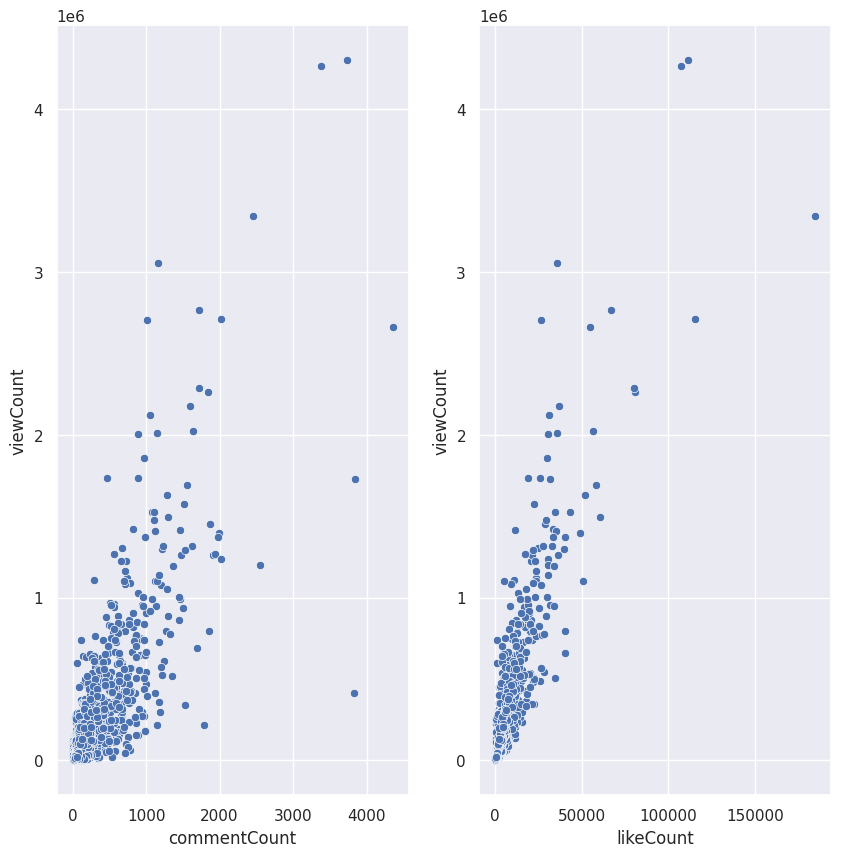

In [56]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = video, x = "commentCount", y = "viewCount", ax=ax[0])
sns.scatterplot(data = video, x = "likeCount", y = "viewCount", ax=ax[1])

<Axes: xlabel='likeRatio', ylabel='viewCount'>

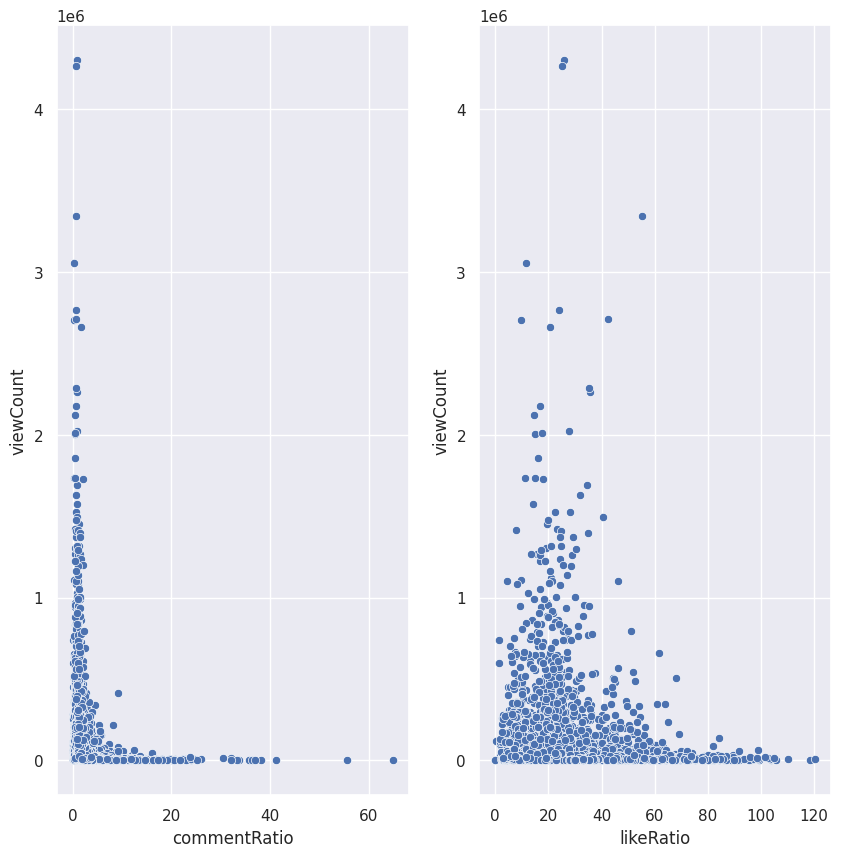

In [57]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = video, x = "commentRatio", y = "viewCount", ax=ax[0])
sns.scatterplot(data = video, x = "likeRatio", y = "viewCount", ax=ax[1])

<Axes: xlabel='durationSecs', ylabel='Count'>

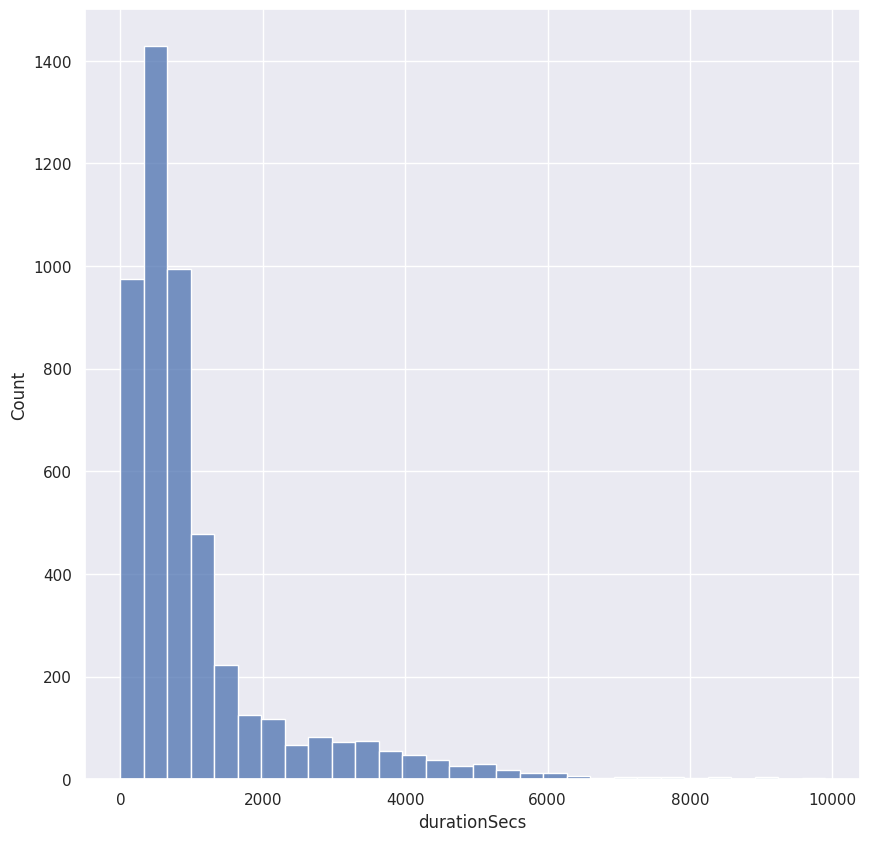

In [58]:
sns.histplot(data=video[video['durationSecs'] < 10000], x="durationSecs", bins=30)

<Axes: xlabel='durationSecs', ylabel='likeCount'>

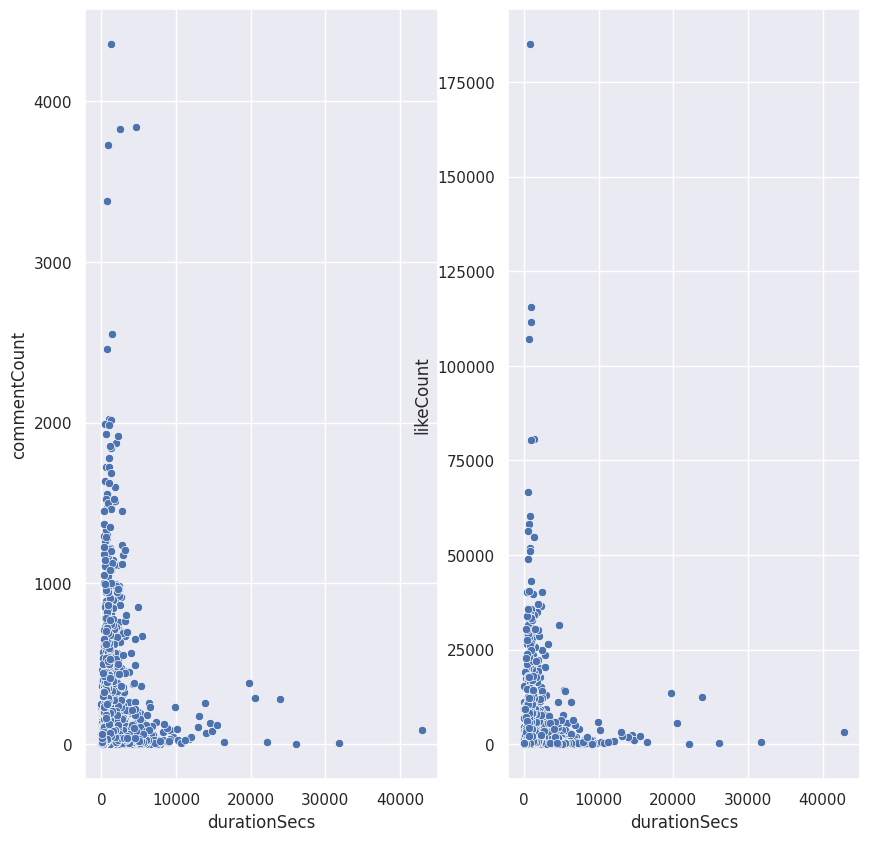

In [59]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = video, x = "durationSecs", y = "commentCount", ax=ax[0])
sns.scatterplot(data = video, x = "durationSecs", y = "likeCount", ax=ax[1])

<Axes: xlabel='titleLength', ylabel='viewCount'>

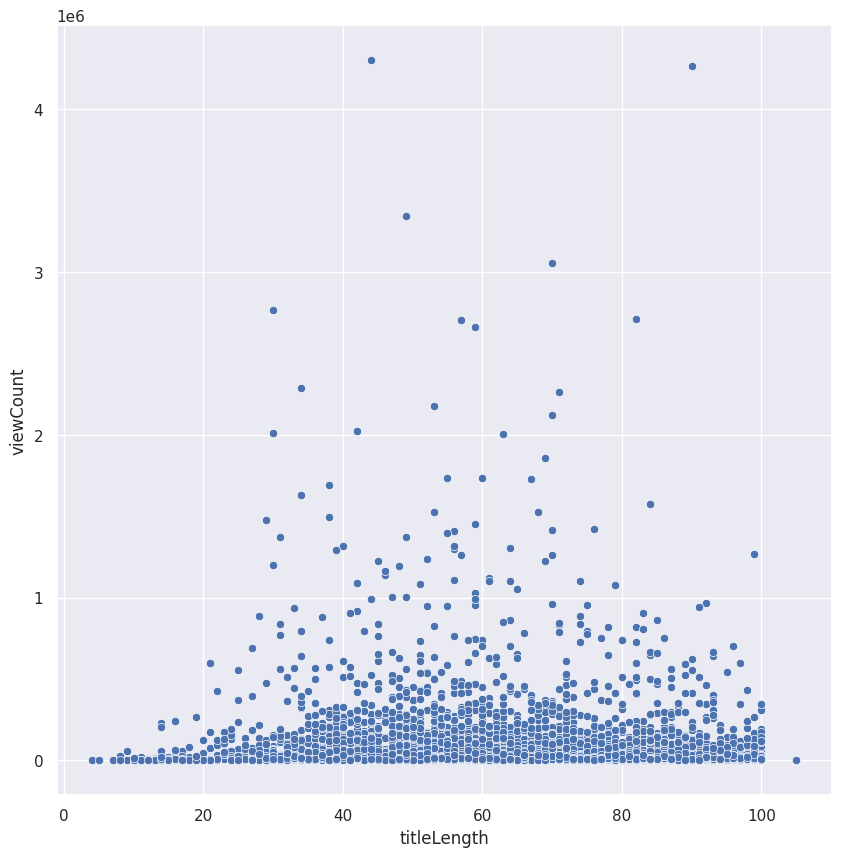

In [60]:
sns.scatterplot(data = video, x = "titleLength", y = "viewCount")

In [62]:
stop_words = set(stopwords.words('english'))
video['title_no_stopwords'] = video['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

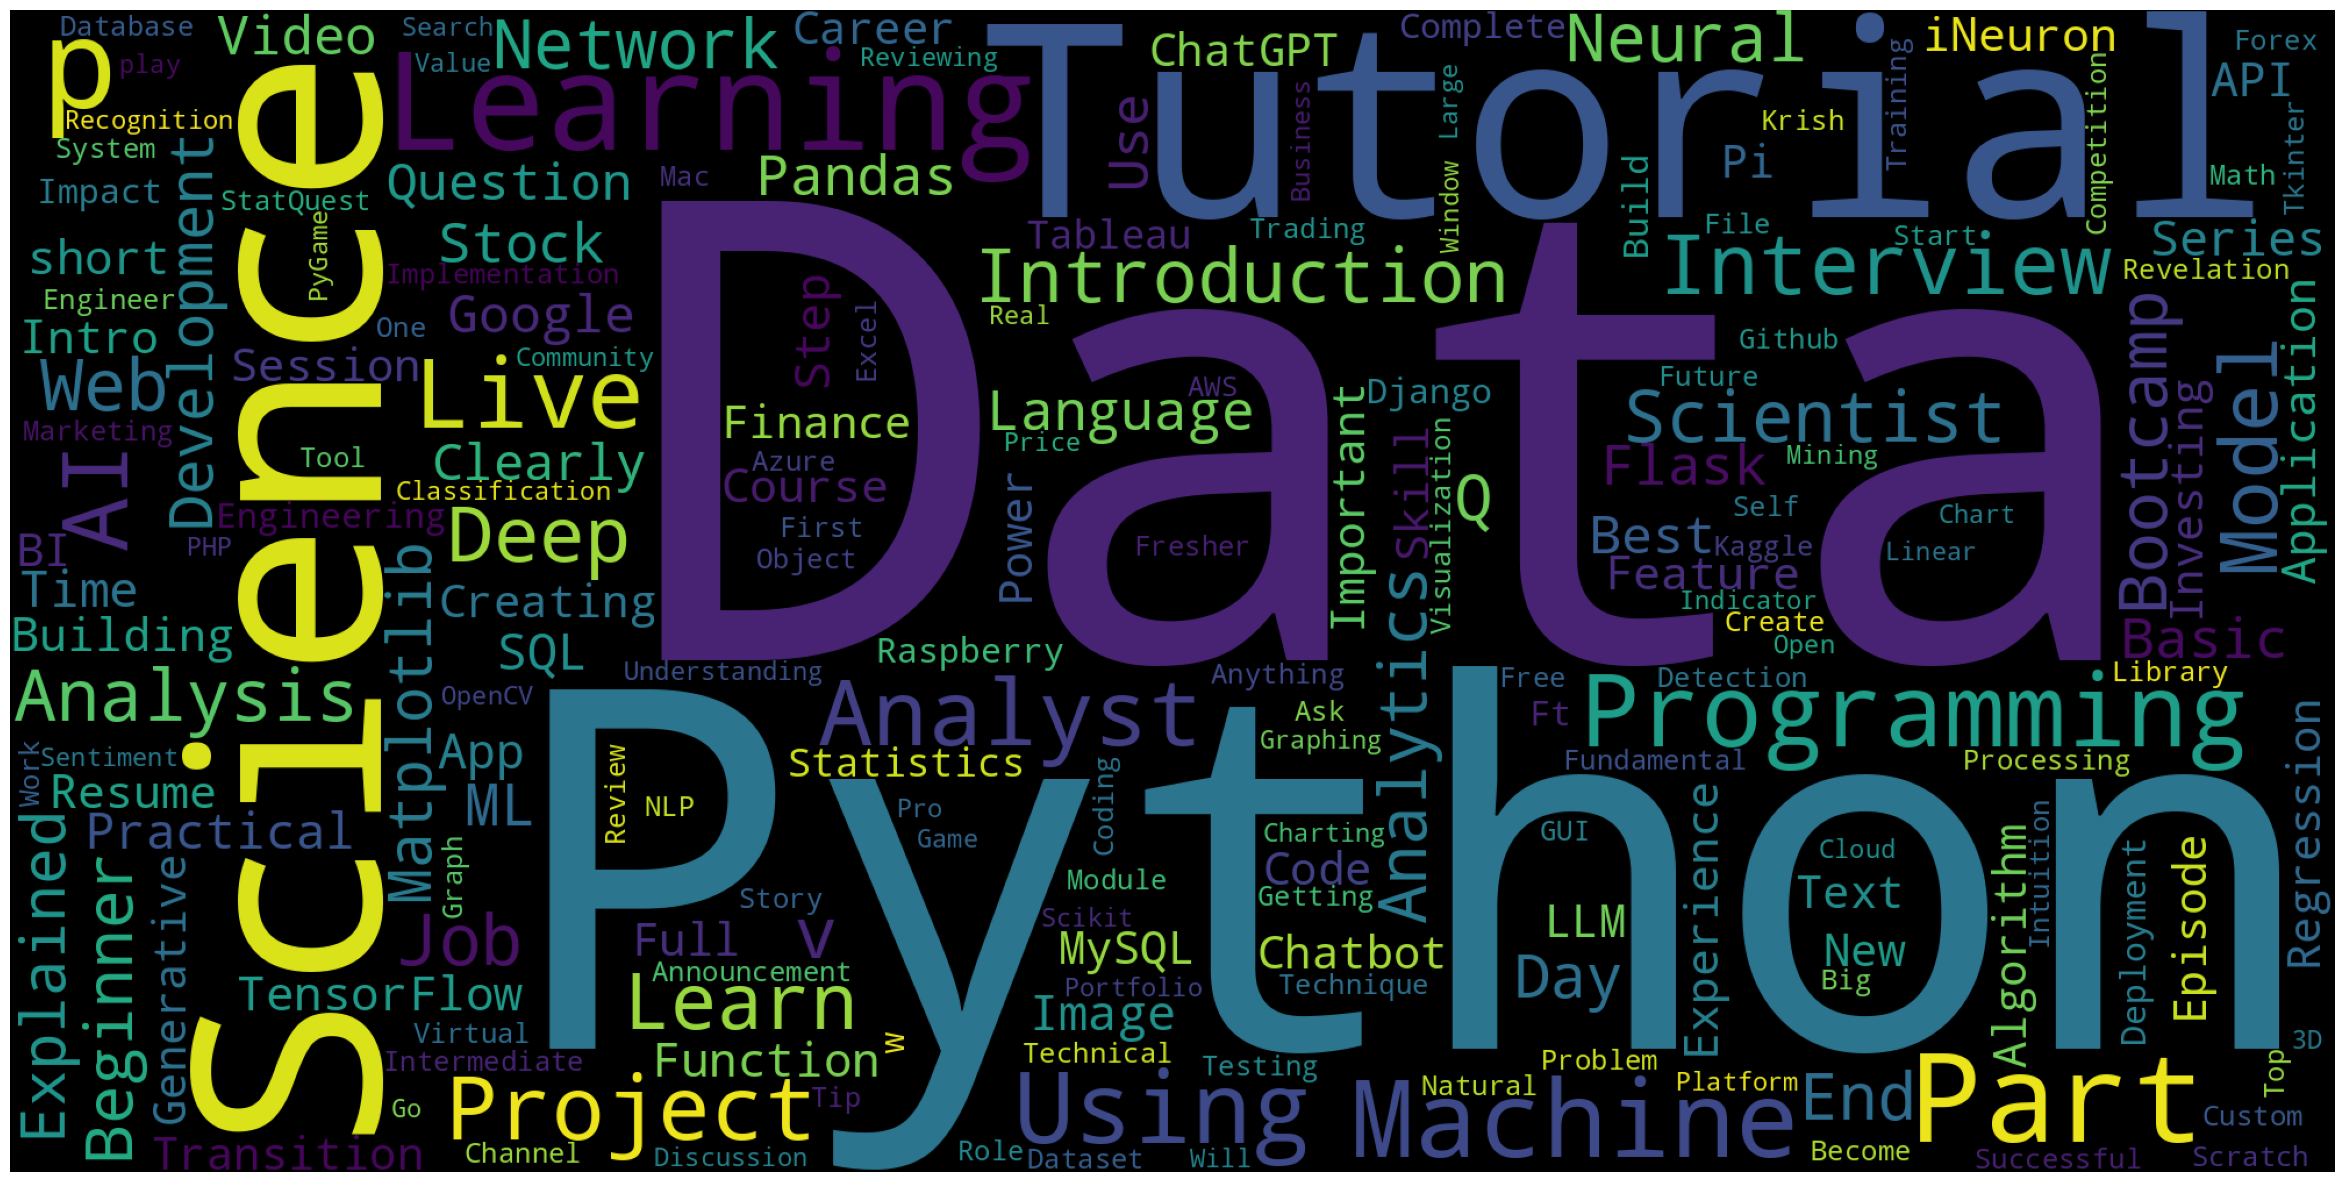

In [63]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud)
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black',
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

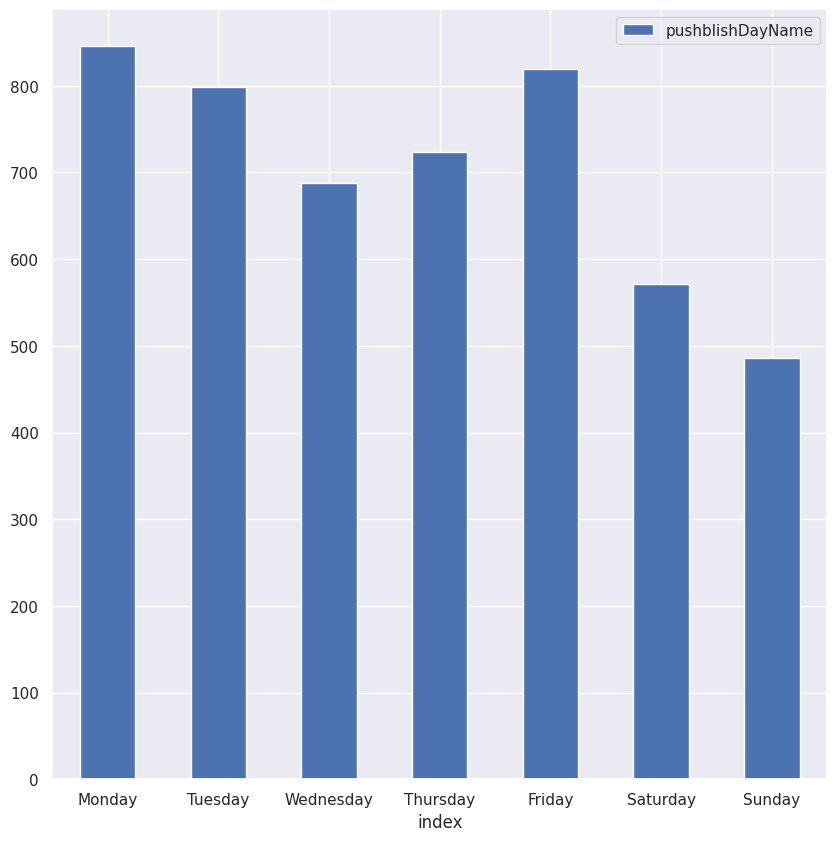

In [66]:
day_df = pd.DataFrame(video['pushblishDayName'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x='index', y='pushblishDayName', rot=0)

In [68]:
comments_df=pd.read_csv("comments_data_top10_channels.csv")

In [69]:
stop_words = set(stopwords.words('english'))
comments_df['comments_no_stopwords'] = comments_df['comments'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in comments_df['comments_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

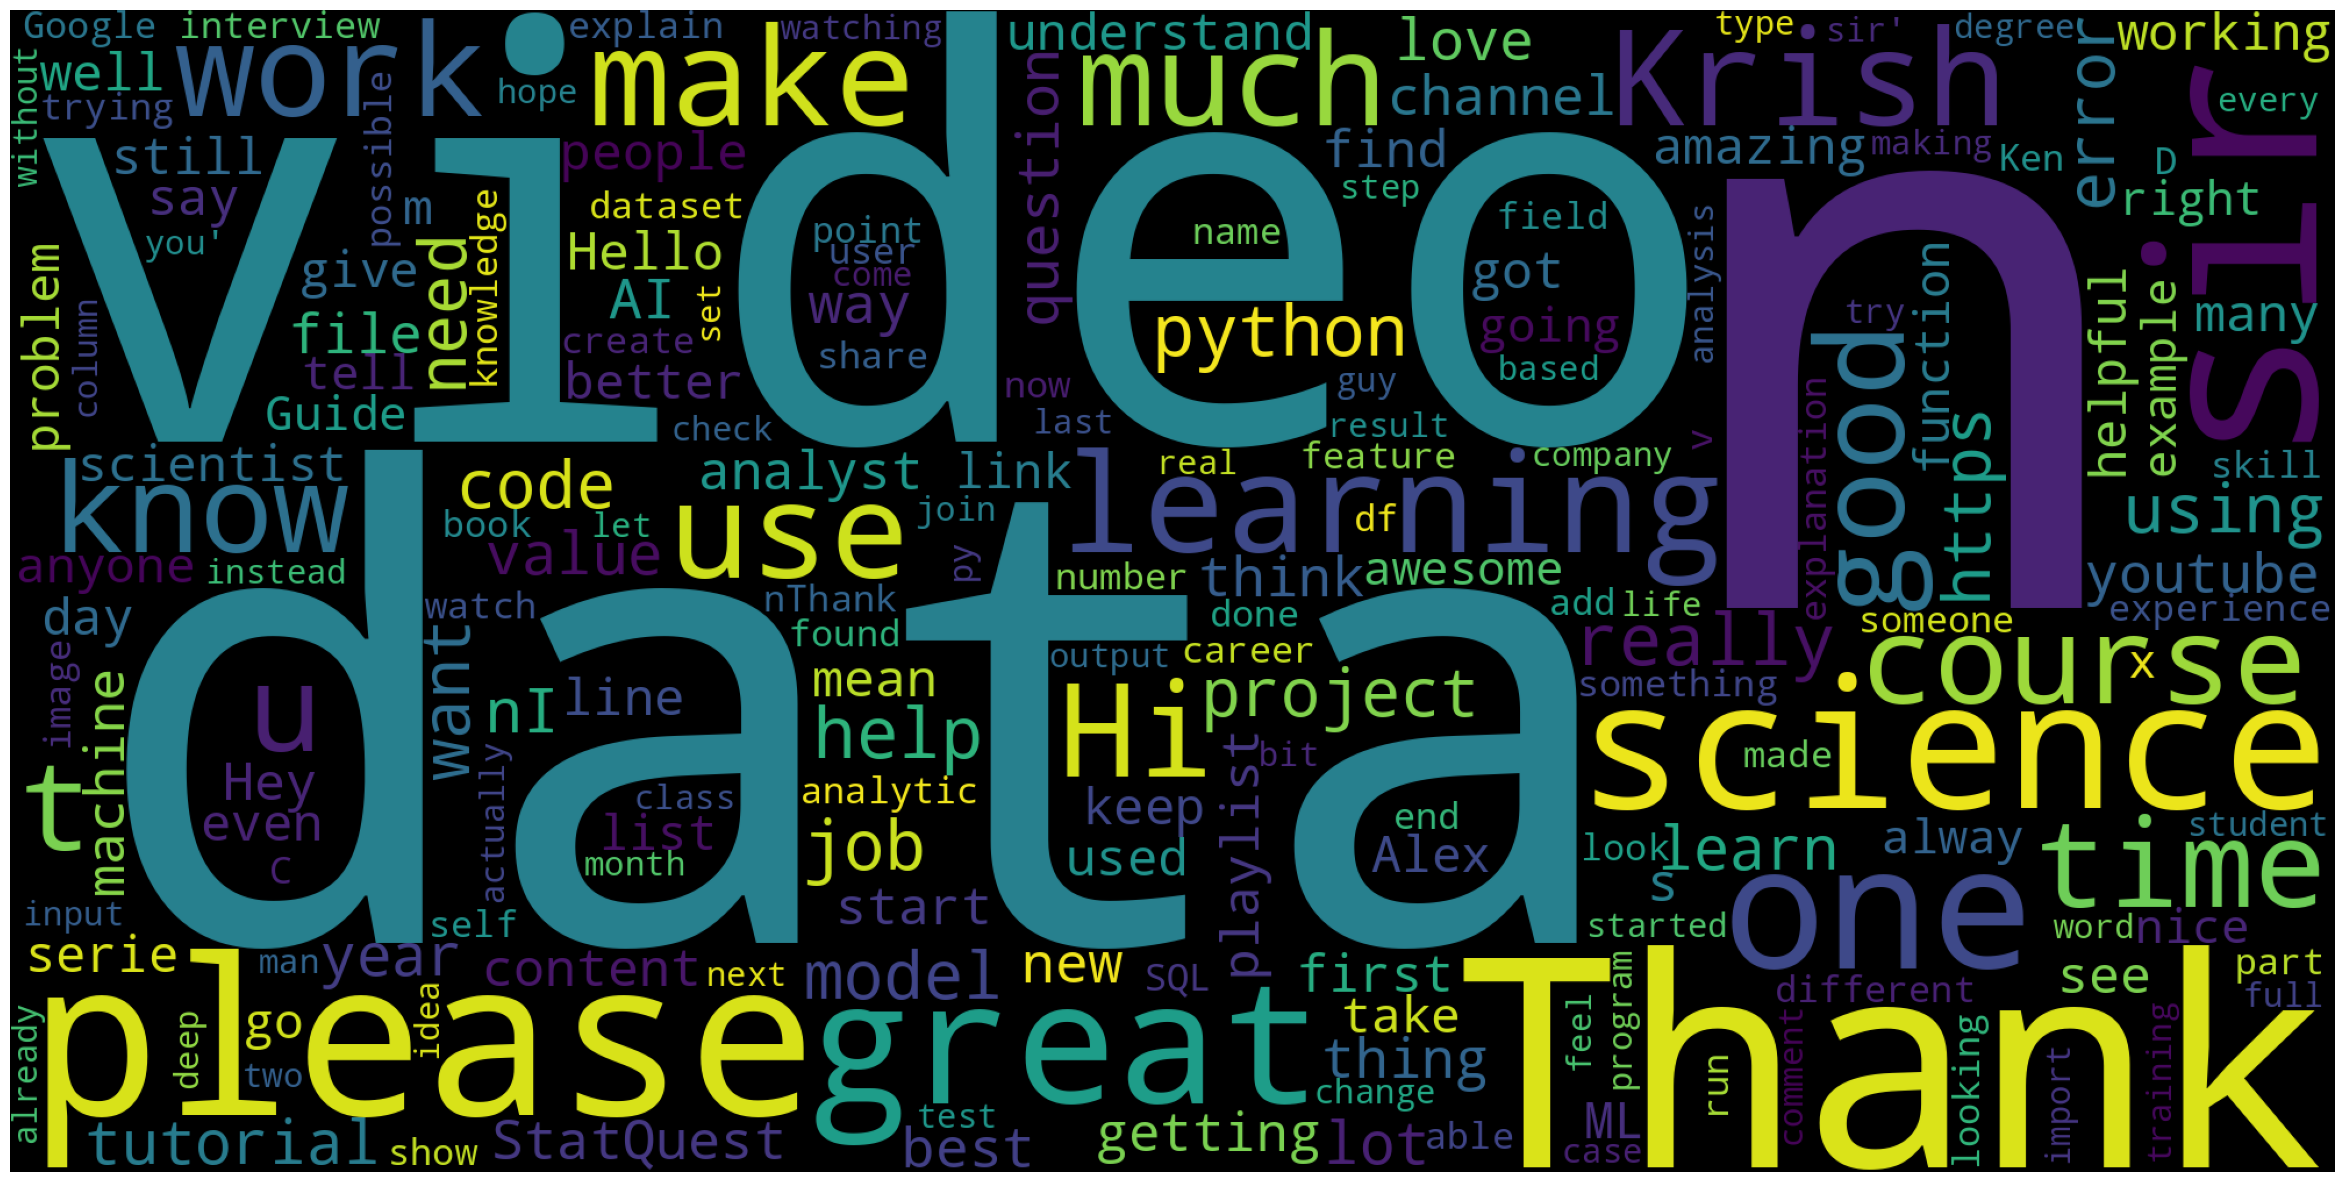

In [70]:
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black',
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

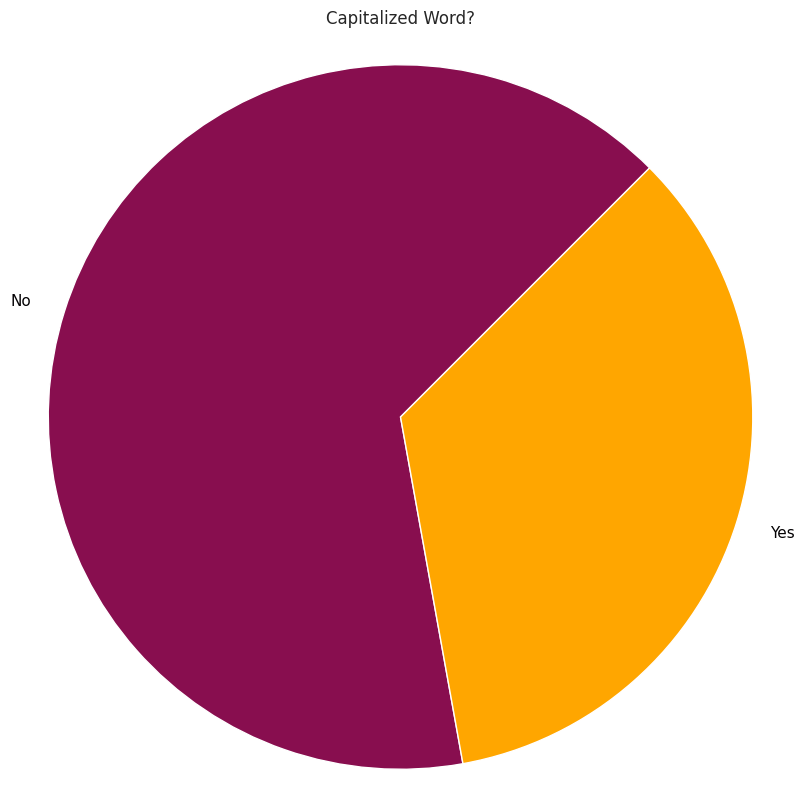

In [76]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


video["contains_capitalized"] = video["title"].apply(contains_capitalized_word)

value_counts = video["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'],
           colors=['#880e4f', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Capitalized Word?')

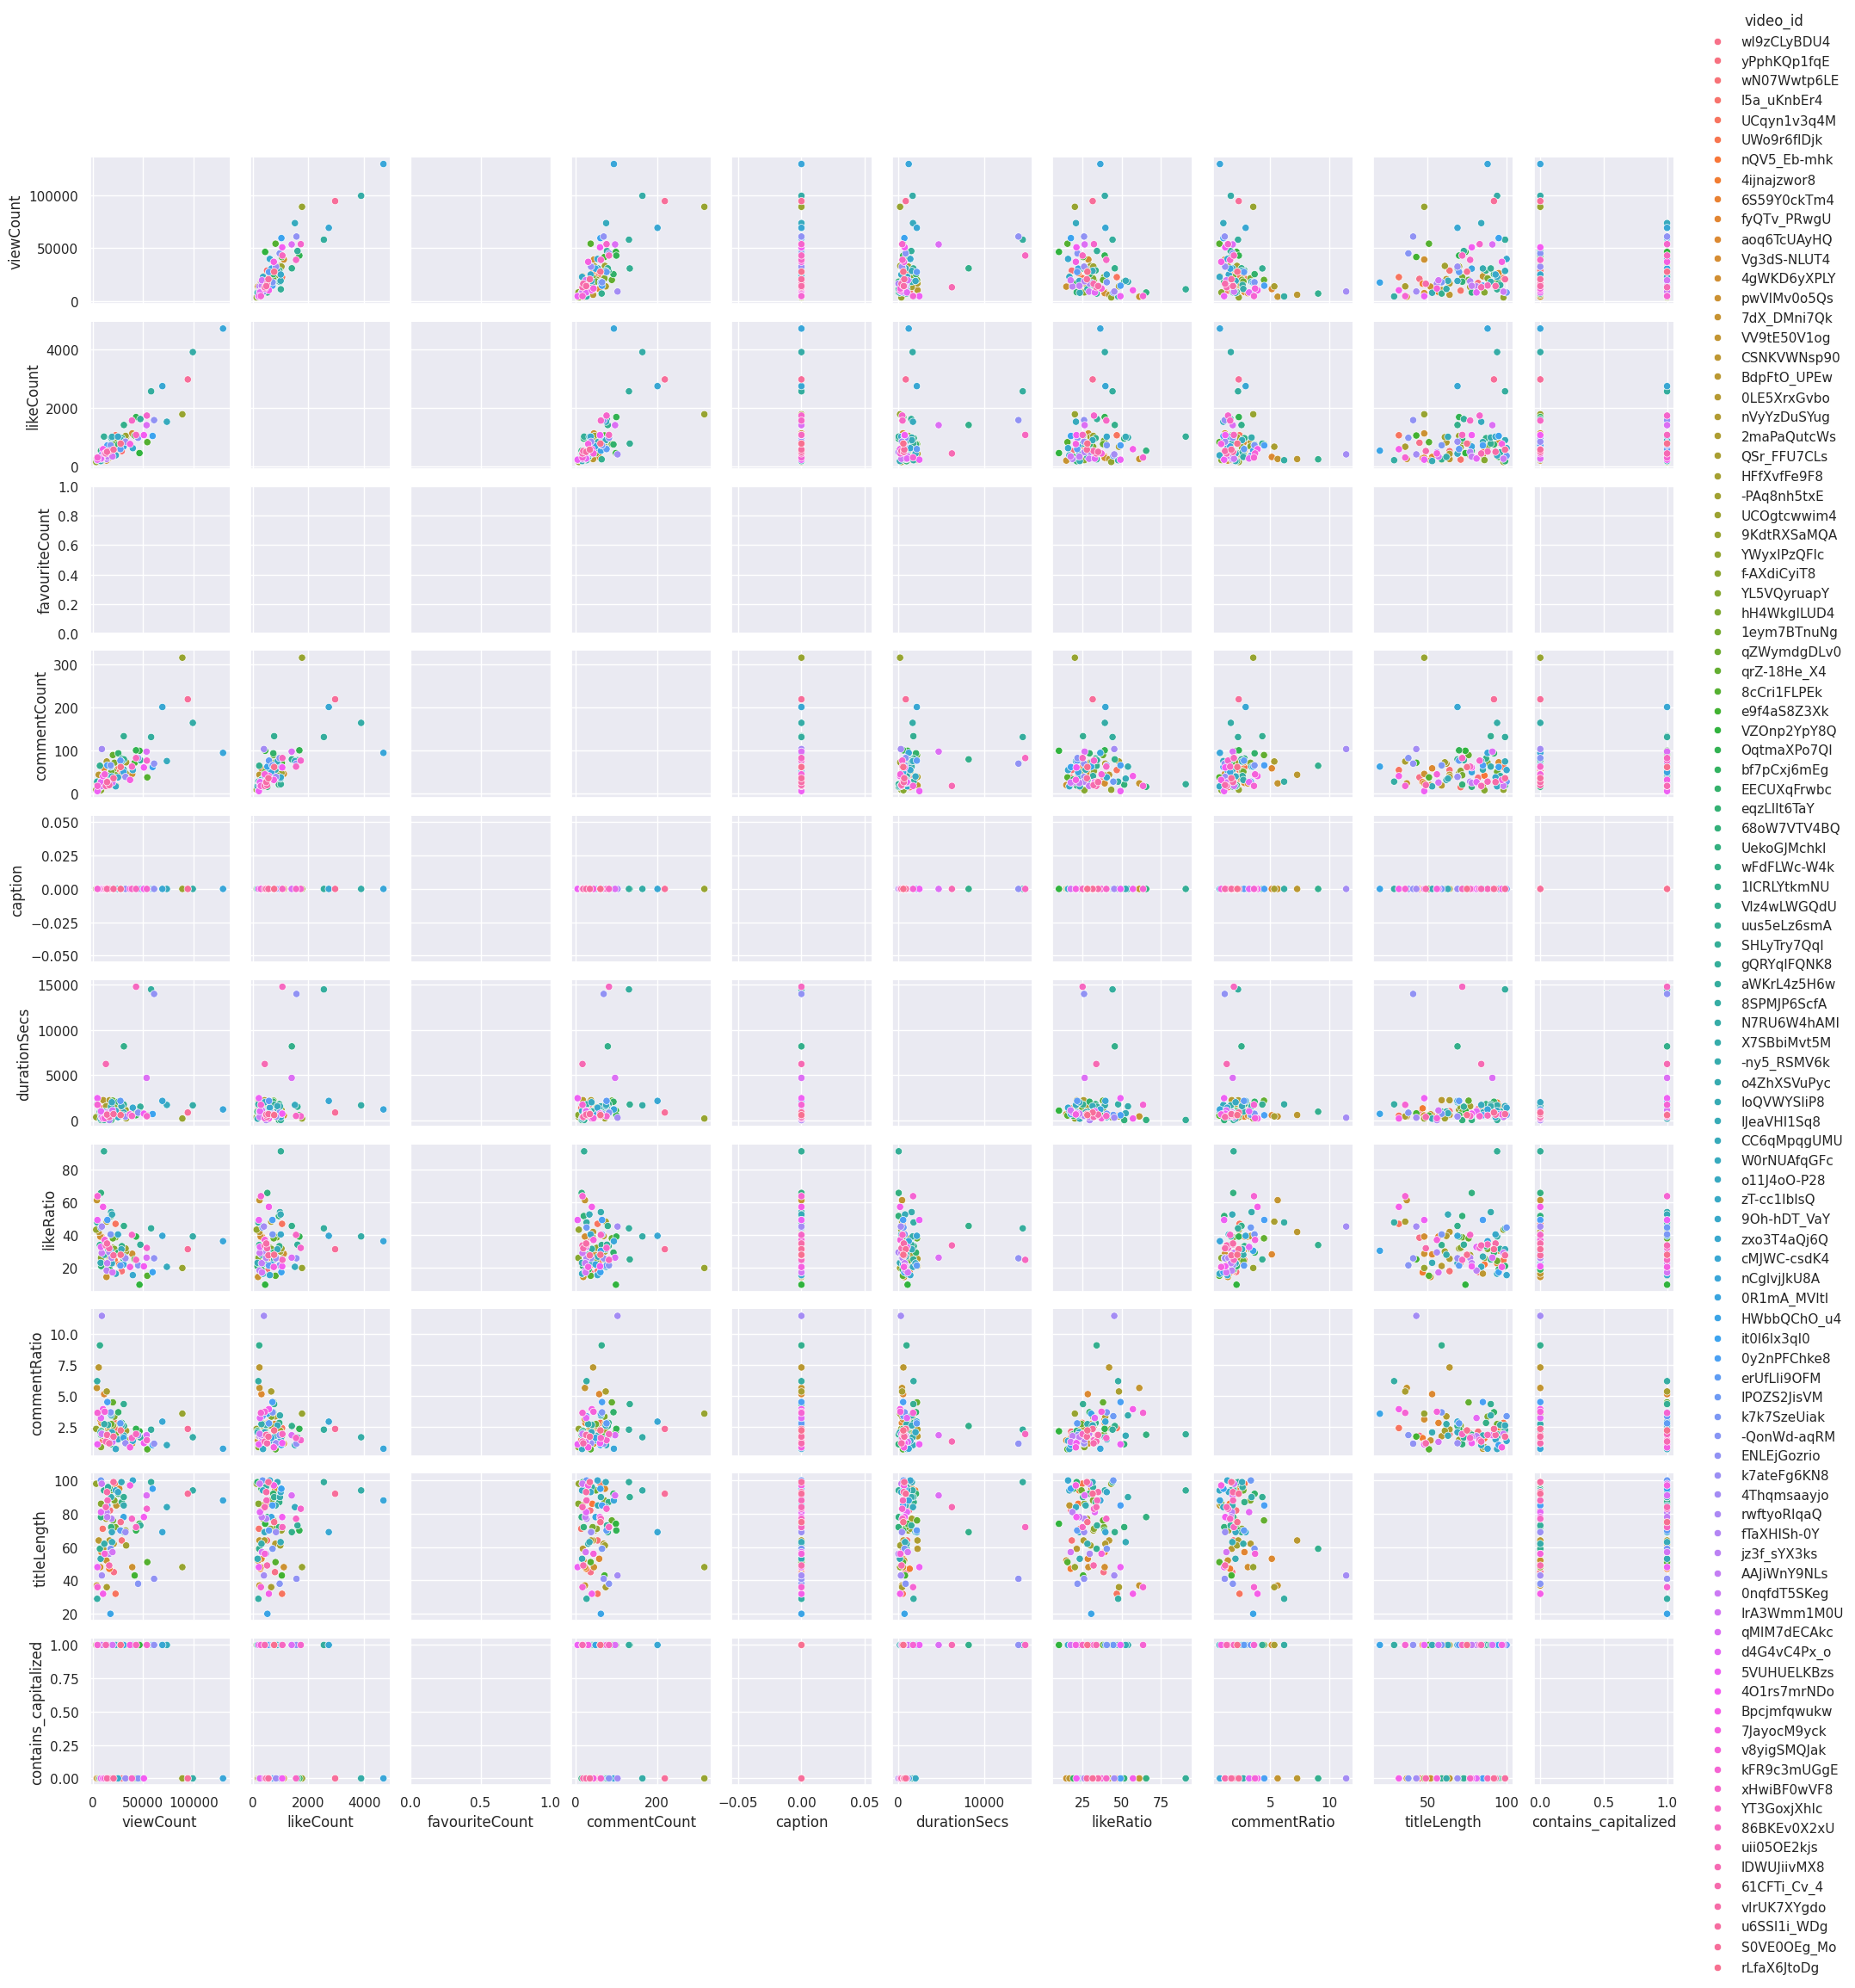

In [89]:
sns.pairplot(video.head(100),hue='video_id',height=2)